# Logistic Regression Model
## Data Preperation

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filepath for CSV file with matchup data
filename = 'matchups.csv'

df = pd.read_csv(filename)

X = df.drop(['outcome', 'id', 'date', 'home_team', 'away_team'], axis=1)
y = df['outcome']
ids = df['id']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X_scaled, y, ids, test_size=0.2, shuffle=True)

X


,home_points-per-game,away_points-per-game,home_true-shooting-percentage,away_true-shooting-percentage,home_offensive-rebounds-per-game,away_offensive-rebounds-per-game,home_defensive-rebounds-per-game,away_defensive-rebounds-per-game,home_steals-per-game,away_steals-per-game,home_assist--per--turnover-ratio,away_assist--per--turnover-ratio,home_personal-fouls-per-game,away_personal-fouls-per-game,home_win-pct-all-games,away_win-pct-all-games
0,102.5,119.5,112.3,113.3,5.0,10.5,32.5,30.0,7.0,8.5,1.375,1.750,19.5,20.5,0.000,0.500
1,120.5,109.5,108.8,104.0,13.0,12.5,29.0,32.5,7.5,8.5,1.710,2.036,27.0,21.0,0.000,0.500
2,103.5,118.5,109.4,130.6,10.0,9.0,36.0,30.5,7.0,6.0,1.000,1.323,21.5,23.5,0.000,1.000
3,108.0,105.0,107.5,118.1,11.0,6.0,31.0,32.0,10.0,5.0,1.500,1.563,20.5,21.0,0.500,0.000
4,106.0,106.5,110.2,109.9,9.5,10.0,31.5,31.5,7.0,11.5,1.517,1.571,21.0,22.0,0.000,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,110.5,116.5,109.9,114.9,13.3,9.9,32.8,35.6,7.2,6.5,1.368,1.760,20.6,18.2,0.244,0.507
1144,117.4,113.5,113.2,113.1,11.3,11.9,32.3,32.3,8.3,7.3,1.858,1.988,21.1,21.4,0.487,0.546
1145,112.3,116.0,117.2,115.0,9.7,10.2,31.4,31.4,7.1,7.8,1.868,1.812,18.9,21.2,0.615,0.436
1146,117.0,115.2,115.5,120.5,11.2,8.7,37.6,32.2,6.4,7.8,1.754,1.847,18.2,20.4,0.714,0.662


## Create model with sklearn and make predictions

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

## Print out Accuracy, Confusion Matrix

In [4]:
print('\nAccuracy:', accuracy)
print(f'Confusion matrix:\n{conf_matrix[0]}\n{conf_matrix[1]}')


Accuracy: 0.6264591439688716
Confusion matrix:
[39 61]
[ 35 122]


## Display coefficients

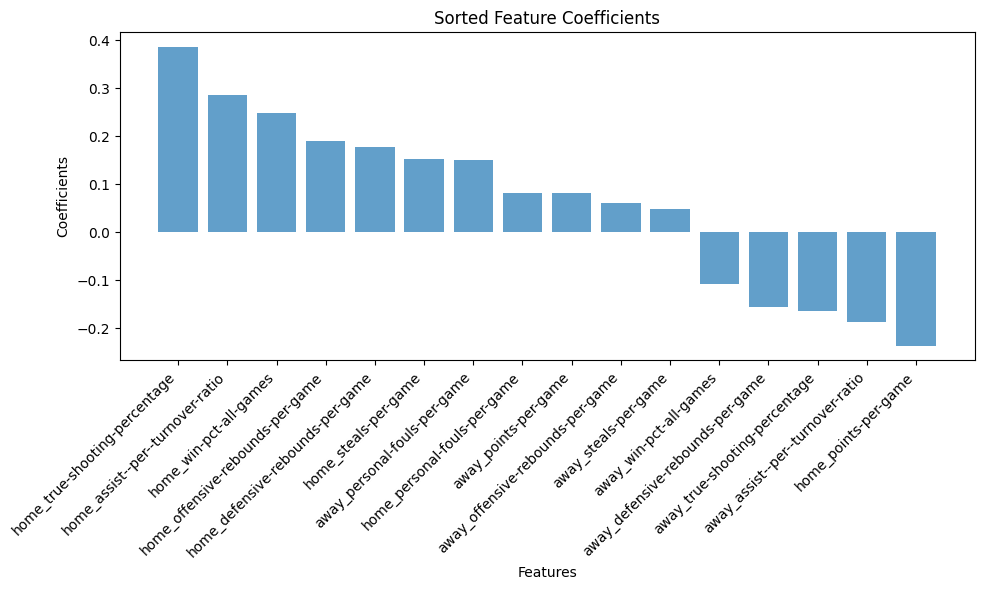

In [11]:
import matplotlib.pyplot as plt

# Sort the coefficients and labels together based on coefficients
coef = model.coef_[0]
sorted_data = sorted(zip(coef, X.columns), reverse=True)
sorted_coef, sorted_labels = zip(*sorted_data)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coef)), sorted_coef, align='center', alpha=0.7)
plt.xticks(range(len(sorted_coef)), sorted_labels, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Sorted Feature Coefficients')
plt.tight_layout()

# Show the plot
plt.show()

## ROC Curve (Receiver Operating Characteristic)

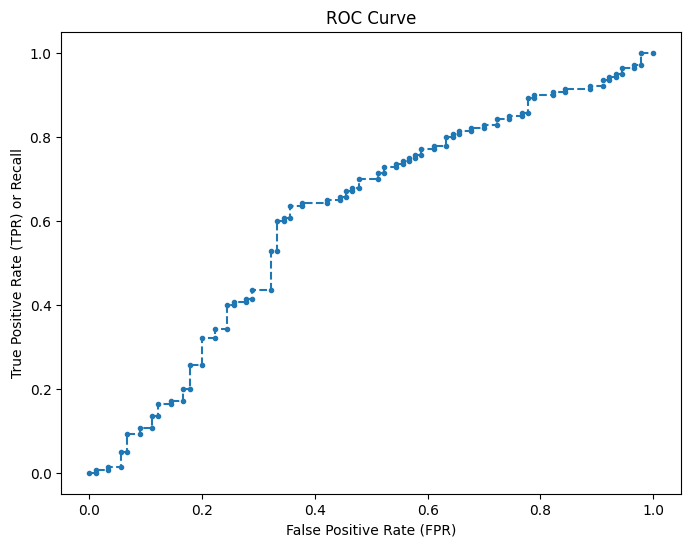

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('ROC Curve')
plt.show()

In [16]:
# AUC-ROC score: 0.5 -> Random Classifier, 1.0 -> Perfect Classifier
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {auc}')

AUC-ROC Score: 0.6103968253968254


## Save the Model with Pickle

In [17]:
from joblib import dump, load

filename = 'finalized_model.sav'
dump(model, filename)


['finalized_model.sav']